In [1]:
import nltk
import pandas as pd
import numpy as np

In [2]:
hotstar=pd.read_csv("hotstar.allreviews_Sentiments.csv")

In [3]:
hotstar.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


In [4]:
hotstar.shape

(5053, 13)

In [5]:
hotstar.isnull().sum()

ID                       0
UserName               722
Created_Date             0
Reviews                  0
Lower_Case_Reviews       0
Sentiment_Manual_BP      0
Sentiment_Manual         0
Review_Length            0
DataSource               0
Year                     0
Month                    0
Date                     0
Sentiment_Polarity       0
dtype: int64

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\sreekar
[nltk_data]     chidurala\AppData\Roaming\nltk_data...


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [8]:
!pip install twython

  Running setup.py bdist_wheel for twython: started
  Running setup.py bdist_wheel for twython: finished with status 'done'
  Stored in directory: C:\Users\sreekar chidurala\AppData\Local\pip\Cache\wheels\c2\b0\a3\5c4b4b87b8c9e4d99f1494a0b471f0134a74e5fb33d426d009
Successfully built twython


In [13]:
senti=SentimentIntensityAnalyzer()
print(senti.polarity_scores('i love india'))
print(senti.polarity_scores('i LOVE india'))

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.169, 'pos': 0.831, 'compound': 0.7125}


In [14]:
print(senti.polarity_scores('i love india')["compound"])

0.6369


In [21]:
def get_sentiment_score(review):
    compound_score=senti.polarity_scores(review)['compound']
    return compound_score
def get_sentiment(score):
    if score>0.25:
        return 'Positive'
    elif score <-.25:
        return "negitive"
    else:
        return 'Neutral'
    
    
hotstar['sentiment_score']=hotstar['Reviews'].apply(get_sentiment_score)
hotstar.head()
hotstar["sentiment_vader"]=hotstar["sentiment_score"].apply(get_sentiment)

In [22]:
hotstar.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity,sentiment_score,sentiment_vader
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral,0.0000,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral,-0.2960,negitive
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative,-0.2846,negitive
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive,0.3612,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral,0.2023,Neutral


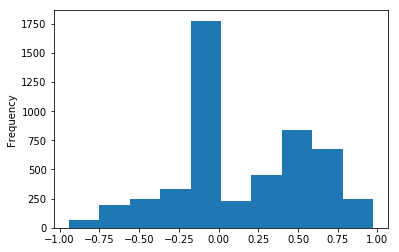

In [20]:
hotstar["sentiment_score"].plot.hist()

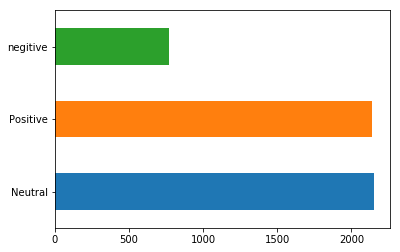

In [23]:
hotstar['sentiment_vader'].value_counts().plot.barh()

In [24]:
hotstar['date']=pd.to_datetime(hotstar['Created_Date'])
hotstar['date'].min(),hotstar['date'].max()

(Timestamp('2017-08-04 00:00:00'), Timestamp('2017-08-13 00:00:00'))

In [30]:
sent_trend=hotstar.groupby(['date','sentiment_vader']).size()
sent_trend=sent_trend.reset_index()
sent_trend=sent_trend.rename(columns={0:'count'})
sent_trend

,date,sentiment_vader,count
0,2017-08-04,Neutral,130
1,2017-08-04,Positive,112
2,2017-08-04,negitive,85
3,2017-08-05,Neutral,177
4,2017-08-05,Positive,108
5,2017-08-05,negitive,111
6,2017-08-06,Neutral,144
7,2017-08-06,Positive,93
8,2017-08-06,negitive,50
9,2017-08-07,Neutral,204


In [42]:
pos_rows=sent_trend[sent_trend['sentiment_vader']=="Positive"]
neg_rows=sent_trend[sent_trend['sentiment_vader']=="negitive"]
neu_rows=sent_trend[sent_trend['sentiment_vader']=="Neutral"]

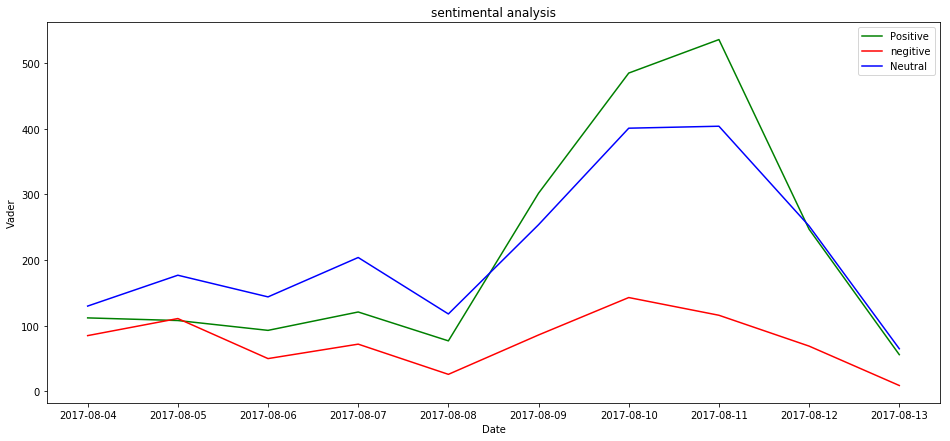

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,7))
plt.plot(pos_rows['date'],pos_rows['count'],color="green")
plt.plot(neg_rows['date'],neg_rows['count'],color="red")
plt.plot(neu_rows['date'],neu_rows['count'],color="blue")
plt.xlabel("Date")
plt.ylabel("Vader")
plt.title("sentimental analysis")
plt.legend(['Positive','negitive','Neutral'])

## supervised semtiment analysis

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
stop_words=nltk.corpus.stopwords.words('english')
stop_words=list(np.setdiff1d(stop_words,['not']))
junk_words=[]
len(stop_words)
stop_words.extend(junk_words)
len(stop_words)

178

In [62]:
docs=hotstar['Reviews'].fillna('').str.lower().str.replace('[^a-z ]','')
docs.head()

0                                                   hh
1                                                   no
2    hotstarhelps during paymnt for premium subscri...
3    hotstartweets i am currently on jio network an...
4    hotstartweets the episodes of sarabhai vs sara...
Name: Reviews, dtype: object

In [63]:
stemmer=nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words=row_text.split(' ')
    #print(row_words)
    row_words= [stemmer.stem(word) for word in row_words if word not in stop_words]
    #print(row_words)
    #print('----')
    return ' '.join(row_words)

docs_clean=docs.apply(lambda v: clean_text(v))

In [70]:
train,test=train_test_split(docs_clean,test_size=.3,random_state=100)
train_y=hotstar.loc[train.index]['Sentiment_Manual']
test_y=hotstar.loc[test.index]['Sentiment_Manual']

In [72]:
cv=CountVectorizer()
cv.fit(train)
train_x=cv.transform(train)
test_x=cv.transform(test)

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [86]:
adaboost_model=RandomForestClassifier(n_estimators=300,random_state=100)
adaboost_model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [87]:
pred_class=adaboost_model.predict(test_x)

In [88]:
from sklearn.metrics import accuracy_score,f1_score,roc_curve,auc

In [89]:
print(accuracy_score(test_y,pred_class))

0.7486807387862797


#### Accuracy score by unsupervised one

In [90]:

accuracy_score(hotstar['Sentiment_Manual'],hotstar['sentiment_vader'])

0.4486443696813774